# **1. 결정 트리**

- 3주차 branch에 있는 `car_evaluation.csv`를 다운받은 후 실습을 진행해 주세요.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **1-a. 'car_evaluation.csv'를 불러와 df에 저장해 주세요.**

In [ ]:
## Colab - 구글 드라이브 마운트
# Colab을 사용하시는 분들만 실행시켜 주시면 됩니다.

from google.colab import drive
drive.mount('/content/drive')

In [10]:
df = pd.read_csv(r"C:\Users\jain5\Desktop\Euron\Data_Handling\car_evaluation.csv")

## **1-b. df의 상위 5개 행을 확인해 주세요.**

In [11]:
df.head(5)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## **1-c. ```info()```를 통해 데이터 정보를 확인해 주세요.**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


전체 로우 수 : 1727(null 값은 x)

칼럼 수 : 7

모두 object 타입 == string

## **1-d. 컬럼명이 적절해 보이지 않네요. 컬럼명을 알맞게 변경해 주세요.**


In [13]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [14]:
# 데이터 재확인

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## **1-e. 범주형 변수에 대해 Label Encoding을 수행해 주세요.**
- Hint: 파머완 p.118, 121~122

레이블 인코딩 -> 상품 분류에 대한 레이블을 문자열에서 숫자형으로 인코딩!

숫자 값에 따른 중요도가 없는 트리 계열 ML 알고리즘에 적용한다.

In [145]:
# 범주형 변수 리스트
cat = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# LabelEncoder 객체 생성
from sklearn.preprocessing import LabelEncoder

# 번주형 변수에 대해 레이블 인코딩을 수행하는 함수
def encode_features(dataDF):
    cat = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
    for i in cat:
        encoder = LabelEncoder()
        encoder = encoder.fit(dataDF[i])
        dataDF[i] = encoder.transform(dataDF[i])
    
    return dataDF
        

# 각 범주형 변수에 대해 레이블 인코딩 수행
df = encode_features(df)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [157]:
# 인코딩 확인
print('인코딩 변환 값:', encoder.transform(cat))
print('인코딩 클래스:', encoder.classes_)
# get_dummies(df)도 가능

인코딩 변환 값: [0 4 2 5 3 6 1]
인코딩 클래스: ['buying' 'class' 'doors' 'lug_boot' 'maint' 'persons' 'safety']


## **1-f. Feature(X)와 Target(y)를 분리해 주세요.**
- target(y) 변수: class

## X는 vaules?로 따로 추출해야 하나?

In [151]:
X = df
y = df['class'].values
print('feature 데이터 세트: ', X)
print('Target 데이터 세트(label): ', y)

feature 데이터 세트:        buying  maint  doors  persons  lug_boot  safety  class
0          3      3      0        0         2       2      2
1          3      3      0        0         2       0      2
2          3      3      0        0         1       1      2
3          3      3      0        0         1       2      2
4          3      3      0        0         1       0      2
...      ...    ...    ...      ...       ...     ...    ...
1722       1      1      3        2         1       2      1
1723       1      1      3        2         1       0      3
1724       1      1      3        2         0       1      2
1725       1      1      3        2         0       2      1
1726       1      1      3        2         0       0      3

[1727 rows x 7 columns]
Target 데이터 세트(label):  [2 2 2 ... 2 1 3]


## **1-g. ```train_test_split()```을 사용하여 훈련 세트와 테스트 세트로 나눠주세요.**
(random_state = 42, train: test = 8:2)

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **1-h. ```DecisionTreeClassifier```를 사용해 훈련 데이터를 fit 한 후, 테스트 데이터로 예측의 정확도를 구하세요.**
(DecisionTreeClassifer의 random_state = 42)

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [154]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 1.0000


오잉...왜 100이 나오지...?

## **1-i. GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으세요.**
- Hint: 파머완 p.113, 207


```
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10]
}
```



In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10]
}

grid_dtree = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)

grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'criterion': 'gini', 'max_depth': None, 'min_...",1.0,1,1.0,1.0,1.0
1,"{'criterion': 'gini', 'max_depth': None, 'min_...",1.0,1,1.0,1.0,1.0
2,"{'criterion': 'gini', 'max_depth': None, 'min_...",1.0,1,1.0,1.0,1.0
3,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",1.0,1,1.0,1.0,1.0
4,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",1.0,1,1.0,1.0,1.0
5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",1.0,1,1.0,1.0,1.0
6,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",1.0,1,1.0,1.0,1.0
7,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",1.0,1,1.0,1.0,1.0
8,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",1.0,1,1.0,1.0,1.0
9,"{'criterion': 'entropy', 'max_depth': None, 'm...",1.0,1,1.0,1.0,1.0


9	{'criterion': 'entropy', 'max_depth': None, 'm...	0.975378	1	0.978339	0.985507	0.963768

rank_test_score 1위인 값

## **1-j. 최적화 된 모델로 테스트 데이터 세트에 대해 예측을 수행해 주세요.**

In [123]:
# fit() 수행시 최적화된 모델 기록
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

best_dt_clf=grid_dtree.best_estimator_
pred=best_dt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 파라미터: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 1.0000
결정 트리 예측 정확도: 1.0000


# **2. 서포트 벡터 머신**

## **2-a. split된 자동차 평가 데이터를 가지고 선형 SVM 모델을 만들어 fit 하세요. 정확도도 함께 출력하세요.**
(C = 10)

C 는 SVM의 regularization parameter(과적합을 막는 일반화 파라미터)

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [125]:
lsm = SVC(kernel='linear', C=10)
lsm.fit(X_train, y_train)
pred = lsm.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('선형 SVM 정확도: {0:.4f}'.format(accuracy))

선형 SVM 정확도: 1.0000


## **2-b. 선형 SVM 모델에서 GridSearchCV를 이용하여 최적의 C값과 최고 score를 출력하세요.**
(cv = 5)

In [126]:
from sklearn.model_selection import GridSearchCV
param = {'C':[0.1,0.5,1,5,10,40]}

In [127]:
grid_SVM = GridSearchCV(lsm, param_grid=param, scoring='accuracy', cv=5, verbose=1)
grid_SVM.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_SVM.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]
print(scores_df)
print('GridSearchCV 최적 파라미터:', grid_SVM.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_SVM.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.009409      0.002527         0.004402        0.001955     0.1   
1       0.003743      0.000742         0.002580        0.000795     0.5   
2       0.004790      0.001330         0.002601        0.001200       1   
3       0.006104      0.000800         0.003602        0.001501       5   
4       0.005602      0.001344         0.002199        0.000400      10   
5       0.004215      0.000764         0.002602        0.000491      40   

       params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.1}                1.0                1.0                1.0   
1  {'C': 0.5}                1.0                1.0                1.0   
2    {'C': 1}                1.0                1.0                1.0   
3    {'C': 5}                1.0                1.0                1.0   
4   {'C': 10}                1.0            

## **2-c. 위에서 구한 최적 파라미터로 다시 예측을 진행하세요. 정확도도 함께 출력하세요.**
Hint: `best_estimator_`

In [128]:
best_lsm=grid_SVM.best_estimator_
pred=best_lsm.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('LSM 예측 정확도: {0:.4f}'.format(accuracy))

LSM 예측 정확도: 1.0000


[SVM 참고사이트](https://todayisbetterthanyesterday.tistory.com/32)

## **2-d. GridSearchCV를 이용하여 최적의 `gamma`, `C` 값을 찾아 최적 가우시안 SVM 모델을 만들고, fit 하세요.**
(가우시안 svm: kernel = 'rbf')

SVM의 default값이 RBF! 

default C값은 1.0, gamma는 gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

[공식문서 참고](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [129]:
params = {'C':[0.1,0.5,1,5,10,40,100],
        'gamma':[0.1,0.25,0.5,0.75,1,10]}

In [130]:
gsm = SVC(kernel='rbf')
grid_GVM = GridSearchCV(gsm, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_GVM.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_GVM.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]
print(scores_df)
print('GridSearchCV 최적 파라미터:', grid_GVM.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_GVM.best_score_))

Fitting 5 folds for each of 42 candidates, totalling 210 fits
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.045910      0.008007         0.024829        0.005891     0.1   
1        0.042106      0.003280         0.020328        0.004383     0.1   
2        0.069382      0.004533         0.033665        0.005105     0.1   
3        0.125092      0.021635         0.034596        0.004228     0.1   
4        0.151602      0.012073         0.039171        0.003646     0.1   
5        0.162194      0.020733         0.039091        0.005459     0.1   
6        0.021232      0.001619         0.010218        0.000750     0.5   
7        0.029840      0.001799         0.013407        0.000474     0.5   
8        0.068955      0.005994         0.024803        0.006031     0.5   
9        0.131335      0.020810         0.029104        0.001119     0.5   
10       0.144373      0.008571         0.034824        0.001740     0.5   
11       0.162920      0.0

In [131]:
best_gsm=grid_GVM.best_estimator_
pred=best_gsm.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('GSM 예측 정확도: {0:.4f}'.format(accuracy))

GSM 예측 정확도: 1.0000


[가우시안 SVM 참고](https://issuebombom.tistory.com/26) 

# **3. 앙상블**

## **3-a. breast_cancer 데이터셋을 ```load()``` 함수를 사용해서 불러온 후, 훈련 세트와 테스트 세트로 나눠주세요.**
(test_size = 0.2, random_state = 42)




In [132]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [133]:
cancer = load_breast_cancer()

# load()로 가져온 데이터셋은 .data에 피처값, .target에 결정값 데이터를 가진다.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

## **3-b. 로지스틱 회귀, KNN, 결정 트리를 개별 모델로 사용하여 개별 모델의 학습/예측/평가를 진행해 보세요.**
(평가는 정확도가 출력되도록 해주세요.)
- 로지스틱 회귀: solver = "liblinear"
- KNN: n_neighbors = 16
- 결정 트리: random_state = 12

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [135]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=16)
dt_clf = DecisionTreeClassifier(random_state=12)

# 반복문으로 개별 모델 학습/예측/평가
classifiers = [lr_clf, knn_clf, dt_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

LogisticRegression 정확도: 0.9561
KNeighborsClassifier 정확도: 0.9649
DecisionTreeClassifier 정확도: 0.9386


## **3-c. 로지스틱 회귀와 결정 트리를 기반으로 하여 '하드 보팅' 방식으로 보팅 분류기를 생성한 후, 학습/예측/평가를 진행해 보세요.**
(평가는 정확도가 출력되도록 해주세요.)

하드 보팅 : 예측한 결괏값들중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 방식

In [136]:
from sklearn.ensemble import VotingClassifier

vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('dt',dt_clf)] , voting='hard')
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9298


## **3-d. KNN과 결정트리를 기반으로 하여 '소프트 보팅' 방식으로 보팅 분류기를 생성한 후, 학습/예측/평가를 진행해보세요.**
(평가는 정확도가 출력되도록 해주세요.)

소프트 보팅 :  레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정하는 방식

In [137]:
from sklearn.ensemble import VotingClassifier

vo_clf = VotingClassifier(estimators=[('KNN',knn_clf),('dt',dt_clf)] , voting='soft')
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9386


# **4. 랜덤 포레스트**

## **4-a. RandomForestClassifier를 이용하여 훈련 데이터를 fit한 후, 테스트 셋으로 예측 정확도를 구하세요.**
(random_state = 42, max_depth = 8)

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [139]:
rf_clf = RandomForestClassifier(random_state=42, max_depth=8)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9649


## **4-b. GridSearchCV를 사용하여 최적의 하이퍼 파라미터 조합을 찾으세요.**
(cv = 2, n_jobs = -1)

In [140]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[10, 50, 100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [1, 2, 4,8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

In [141]:
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score']]
# split2_test_score 없음!
print(scores_df)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.076031      0.015519         0.006498    2.498150e-03   
1         0.259139      0.001501         0.015002    2.503395e-06   
2         0.520257      0.014528         0.049039    1.450884e-02   
3         0.056000      0.003977         0.007261    2.270579e-03   
4         0.226122      0.001507         0.030509    1.449192e-02   
..             ...           ...              ...             ...   
211       0.219089      0.001998         0.013999    1.430511e-06   
212       0.451419      0.007733         0.025009    9.939671e-04   
213       0.044265      0.000265         0.005000    1.192093e-07   
214       0.228583      0.002501         0.015009    1.000047e-03   
215       0.394145      0.006998         0.015526    1.522422e-03   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
0                 6                      1                       8   
1                 6            

## **4-c. 위에서 구한 최적의 하이퍼 파라미터로 다시 RandomForestClassifier를 학습 시킨 뒤에, 예측 정확도를 측정해 보세요.**


In [142]:
best_rm=grid_cv.best_estimator_
pred=best_rm.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('RandomForestClassifier 예측 정확도: {0:.4f}'.format(accuracy))

RandomForestClassifier 예측 정확도: 0.9649


## **4-d. ```feature_importances_``` 속성을 이용하여 전체 feature의 피처 주요도를 막대 그래프로 시각화 해보세요.**
(index = cancer.feature_names)  
Hint: 파머완 p.210

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

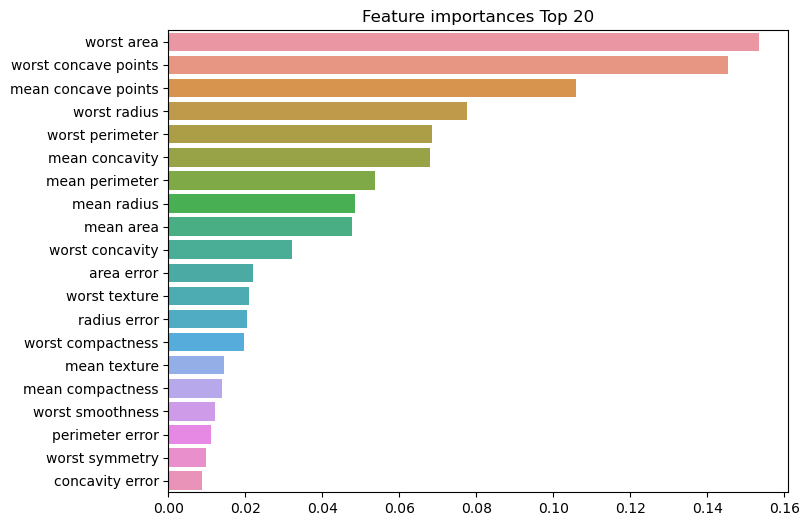

<Figure size 640x480 with 0 Axes>

In [144]:
# feature_importances_를 이용해 알고리즘이 선택한 피처릐 중요도 알기
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index = cancer.feature_names )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')